In [1]:
!pip install ktrain
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 42.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319964 sha256=2958

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
trainSet = pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv')
testSet =  pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv')

In [3]:
!pip install bnltk
!pip install bnlp-toolkit==4.0.0.dev4

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [4]:
#Tokenizer
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

#for Train Set
for i in range(0,trainSet.shape[0]):
    text = bnltk.word_tokenize(trainSet['Data'][i])
    trainSet['Data'][i] = text
#For Test Set   
for i in range(0,testSet.shape[0]):
    text = bnltk.word_tokenize(testSet['Data'][i])
    testSet['Data'][i] = text

In [5]:
pip install bangla_stemmer

Note: you may need to restart the kernel to use updated packages.


In [6]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

for i in range(0,trainSet.shape[0]):
    words = trainSet['Data'][i]
    trainSet['Data'][i] =  stmr.stem(words)
    
for i in range(0,testSet.shape[0]):
    words = testSet['Data'][i]
    testSet['Data'][i] =  stmr.stem(words)

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
appl

In [7]:
trainSet.head()

,Data,Label
0,"[মুগ্ধ, হয়, গেল, মামু., আর, তোমায়, কি, কমু., ব...",1
1,"[এই, কুত্ত, বাচ্চা, জন্য, দেশ, আজ, এমন, অবস্তা...",2
2,"[ভাই, আপন, কথা, যাদু, রয়]",1
3,"[উওর, আম, অনেক, ভাল, লাগ]",1
4,"[আম, নিজ, গাড়ী, নিয়ে, কি, সাজেক, যেত, পারবো, ...",0


In [8]:
trainSet['Data'] = trainSet['Data'].apply(' '.join)

In [9]:
testSet['Data'] = testSet['Data'].apply(' '.join)

In [10]:
trainSet.head()

,Data,Label
0,মুগ্ধ হয় গেল মামু. আর তোমায় কি কমু. বলো তোমায় ...,1
1,এই কুত্ত বাচ্চা জন্য দেশ আজ এমন অবস্তায় এই তিন...,2
2,ভাই আপন কথা যাদু রয়,1
3,উওর আম অনেক ভাল লাগ,1
4,আম নিজ গাড়ী নিয়ে কি সাজেক যেত পারবো না ? প্রা...,0


In [11]:
testSet.head()

,Data,Label
0,"স্বাস্থ্যবান হত চাই , আমি বয়স তুলনায় অনেক বেশি...",0
1,ভাইয়া নতুন ভিডি আসে না কেন,0
2,সৌরভ গাঙ্ ছাড়া দাদাগিরি কখনো জমে উঠত না,0
3,ক্রিকেট কে বাচা হলে পাপ অতিশিগ্রি তাকে গ্রেফত ...,2
4,আমি সেই ঝালপ্রিয়ো মানুষ,1


In [12]:
from sklearn.model_selection import train_test_split
train = trainSet['Data'].values.tolist()
test = testSet['Data'].values.tolist()
train_cluster_id = trainSet['Label'].tolist()
test_cluster_id = testSet['Label'].tolist()

In [13]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [14]:
# X_train.head()

In [15]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [16]:

y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]


In [17]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 45


In [18]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 920s 716ms/step - loss: 0.9203 - accuracy: 0.5680 - val_loss: 0.8208 - val_accuracy: 0.6393
Epoch 2/10
1258/1258 [==============================] - 896s 712ms/step - loss: 0.7513 - accuracy: 0.6708 - val_loss: 0.7595 - val_accuracy: 0.6778
Epoch 3/10
1258/1258 [==============================] - 896s 712ms/step - loss: 0.6061 - accuracy: 0.7468 - val_loss: 0.7525 - val_accuracy: 0.6929
Epoch 4/10
1258/1258 [==============================] - 896s 712ms/step - loss: 0.4459 - accuracy: 0.8228 - val_loss: 0.8241 - val_accuracy: 0.6892
Epoch 5/10
1258/1258 [==============================] - 896s 712ms/step - loss: 0.3186 - accuracy: 0.8782 - val_loss: 1.0085 - val_accuracy: 0.6797
Epoch 6/10
1258/1258 [==============================] - 896s 712ms/step - loss: 0.2189 - accuracy: 0.9197 - val_loss: 1.0223 - val_accuracy: 0.7062
Epoch 7/10
1258/1258 [===========================

In [19]:
learner.validate(class_names=t.get_classes()) 

50/50 [==============================] - 9s 128ms/step
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       361
           1       0.76      0.76      0.76       654
           2       0.75      0.77      0.76       571

    accuracy                           0.71      1586
   macro avg       0.68      0.68      0.68      1586
weighted avg       0.70      0.71      0.71      1586



array([[186,  94,  81],
       [ 91, 496,  67],
       [ 73,  60, 438]])

In [20]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

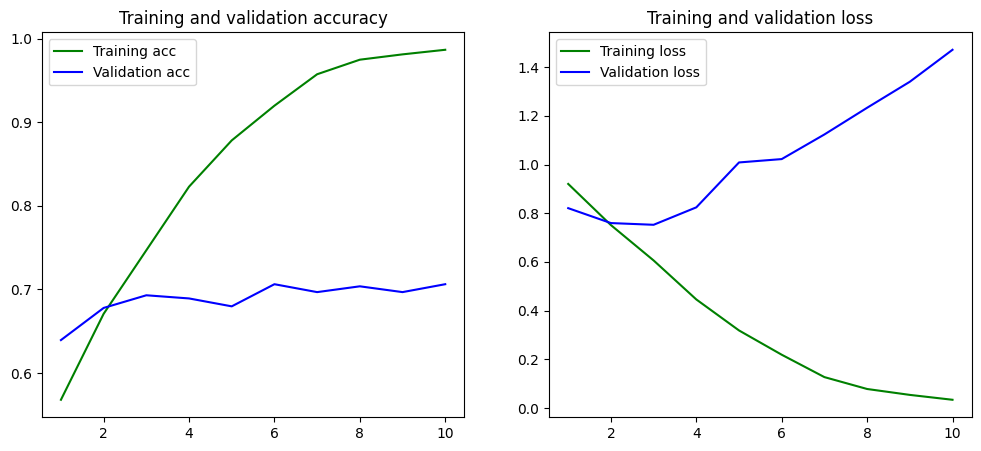

In [21]:
PlotGraph(history)